<a href="https://colab.research.google.com/github/LohanRosa/Ifood-work/blob/main/Ifood_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nosso desafio: Desafio Ifood

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

Perfis de clientes

Preferências do produto

Sucessos/fracassos da campanha

Desempenho do canal

##O objetivo de hoje é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:

Quantos dados temos? Linhas e colunas

Quais são as colunas numéricas?

Temos duplicados na nossa base? Se tivermos, retire-os

Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?

Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

##Vamos agora entender o perfil de clientes que temos

Qual é o maior salário encontrado na nossa base? Veja na coluna Income

Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income

Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level

Quantos clientes temos em cada estado civil? Veja na coluna marital_status

##Agora vamos ver como os dados se correlacionam

Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids

As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids

Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

Vá além!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading a csv file and show up
df = pd.read_csv("mkt_data.csv")
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [ ]:
# we have 2205 rows and 44 columns
df.shape


(2205, 44)

In [ ]:
# showing all the types columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [ ]:
# select only numbers columns
numerics = ['int64', 'float64']
df.select_dtypes(include = numerics).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

In [ ]:
# the dataframe don't have duplicated
df.duplicated().sum()

0

In [ ]:
# sum the null dataframe
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

we have null on dataframe, in columns:

marital_Divorced
marital_Married
marital_Single
marital_Together
marital_Widow
education_2n Cycle
education_Basic
education_Graduation
education_Master
education_PhD

The nulls indicated above may mean that the person does not have that particular characteristic. Note that these columns only have nulls or a certain other value. For example:

In [ ]:
# pick a value column education_PhD
df.education_PhD.value_counts()

5.0    476
Name: education_PhD, dtype: int64

The education_PhD column only has the number 5.0, which appears 476 times. The remainder is null. This is a great indication that null means that the person does not have that particular variable. In the case above, she does not have a PHD

So these columns can become a bool - 1 if it did and 0 if it didn't (null)

In [ ]:
# selecting columns with null
null_columns = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

In [ ]:
# replacing with bool
for item in null_columns:
  df["booleano" + str(item)] = np.where(df[item].isnull(), 0, 1)  # if isnull replacing per 0, else replacing per 1


In [ ]:
df # look at the last columns

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# here we make a descibre to see mean, std, min,25%, 50% median, 75%, max 100%
df[["kids", "Income", "expenses"]].describe()

,kids,Income,expenses
count,2205.000000,2205.000000,2205.000000
mean,0.948753,51622.094785,562.764626
std,0.749231,20713.063826,575.936911
min,0.000000,1730.000000,4.000000
25%,0.000000,35196.000000,56.000000
50%,1.000000,51287.000000,343.000000
75%,1.000000,68281.000000,964.000000
max,3.000000,113734.000000,2491.000000


de acordo com a tabela, o valor máximo para salario é de $113.734 dólares / ano

Text(0.5, 0, 'Salary')

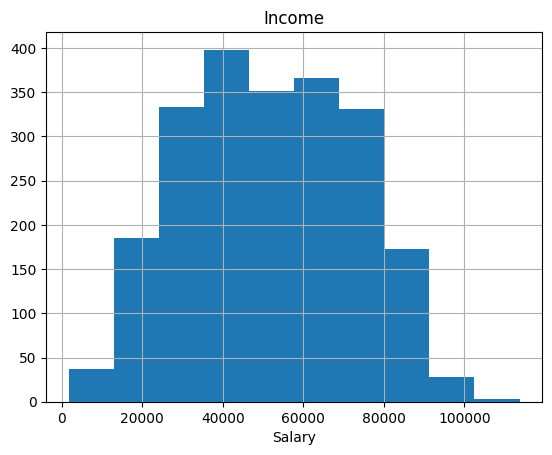

In [ ]:
df["Income"].hist()
plt.title("Income")
plt.xlabel("Salary")


<Axes: >

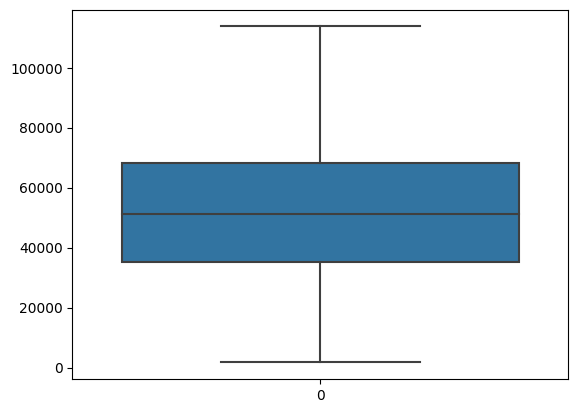

In [ ]:
# make a boxplot
sns.boxplot(df["Income"])

In [ ]:
df["Income"].std()/df["Income"].mean()

0.4012441554786958

In [ ]:
df["Income"].skew()

0.013164263414417078

Os salarios estão bem proximos e bem distribuidos na nossa base. temos alguns salarios altos e outros salario mais baixos. Não temos outliners visualizando o boxplot. com a Skew vemos que a curva se aproxima de uma normal.


<Axes: xlabel='education_level', ylabel='count'>

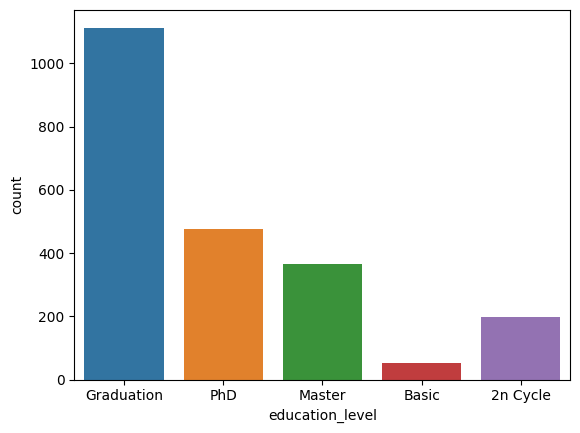

In [ ]:
# gráfico de barras por educação
sns.countplot(x=df["education_level"])

A maior parte dos nossos clientes tem graduação completa. poucos clientes concluíram somente o nível básico. No geral, podemos dizer que nossos clientes tem nivel superiores de educação

<Axes: xlabel='marital_status', ylabel='count'>

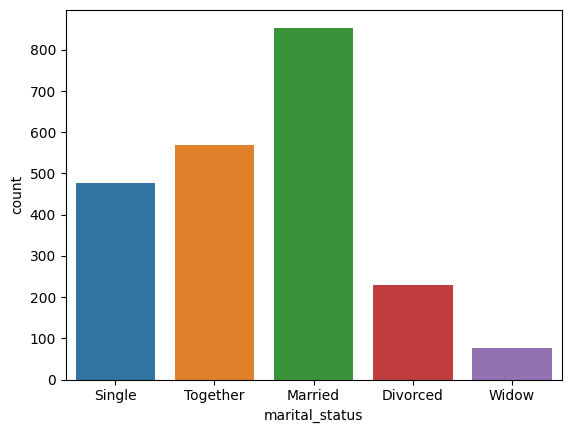

In [ ]:
#gráfico de barras por estados civil
sns.countplot(x=df["marital_status"])

A maior parte dos clientes são casados ou são "together" (moram juntos). poucos são viúvos

<Axes: xlabel='marital_status', ylabel='kids'>

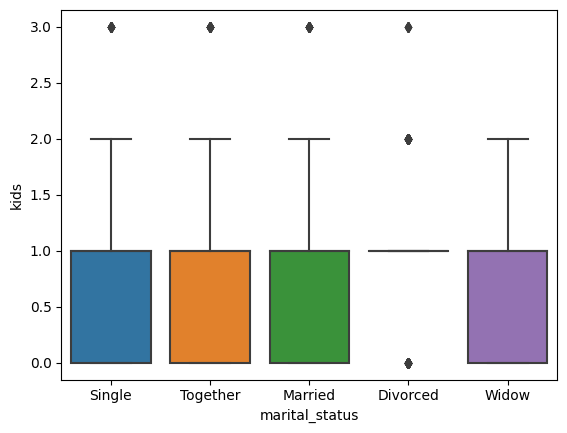

In [ ]:
# boxplot de quem tem filhos
sns.boxplot(x="marital_status", y="kids", data=df)

In [ ]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


In [ ]:
# vamos calcular a media de filhos por statos de união
df.groupby(["marital_status"])["kids"].mean()


marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

In [ ]:
# calculando a mediana de filhos por status de união
df.groupby(["marital_status"])["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Apesar dos números serem muito próximos, olhando apenas a média dizemos que single(solteiros) tem uma quantidade menor de filhos quando comparado aos outros grupos. Porém, como podemos ver no boxplot e na mediana, é um número muito próximo um do outro. Precisaríamos de um teste de hipótese para comprar as diferenças (o que eu irei fazer nas próximas semanas)

<Axes: xlabel='kids', ylabel='expenses'>

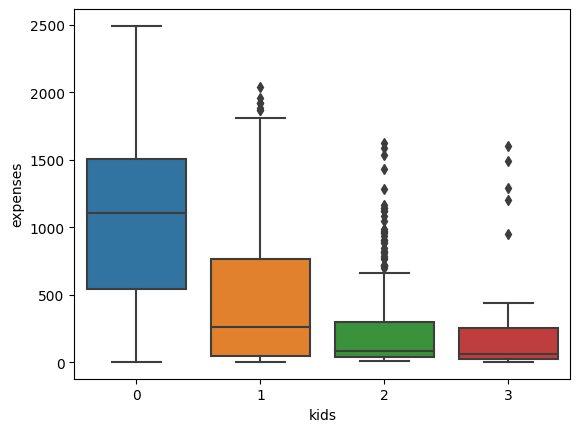

In [ ]:
sns.boxplot(x='kids', y='expenses', data=df)

In [ ]:
df.groupby("kids")["expenses"].mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

In [ ]:
df.groupby("kids")["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Podemos ver que tanto a média quanto a mediana 0 e 1 filho é maior nessa amostra de dados, porém a média de 2 filhos é menor do que de 3 filhos, enquanto a mediana de 2 filhos é maior do que de 3 filhos.
Ambos os grupos 2 e 3 tem médias bem maiores do que a mediana, indicando outliers superiores (o próprio gráfico já mostra isso). Grupo 1 também tem outliers superiores, mas essa diferença é menos acentuada.
Pessoas com nenhum filho tem uma distribuição um pouco mais similar a uma normal (sem outliers, e mediana levemente centrada do meio do boxplot)

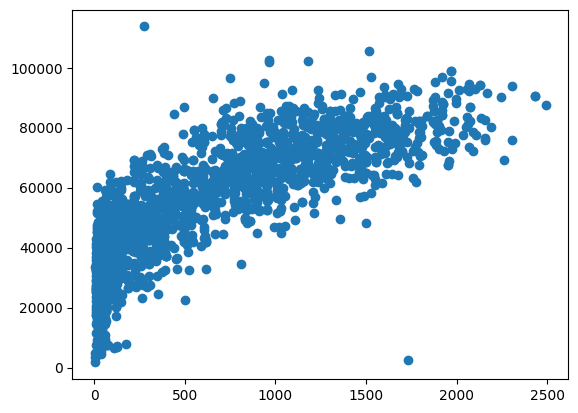

In [ ]:
# iremos fazer um gráfico de dispersão para mostrar o "expenses" vs "income"
plt.scatter(df["expenses"], df["Income"])
plt.show()

A correlação de pearson é dada pela fórmula abaixo. O resultado foi 0.82.

In [ ]:
df["expenses"].corr(df["Income"])

0.8230660021398378

Aparentemente existe uma correlação diretamente proporcional, em que pessoas que ganham mais também gastam mais